# OCCURRENCE, SPECIATION, AND EXTINCTION OF MUSTELIDAE

# Introduction
The Mustelidae family consists of carnivorous mammals, such as weasels, polecats, otters, and wolverines. This family is the largest family of the Carnivora order. With multiple subfamilies within Mustelidae, it is believed that the lineages went through adaptive radiation, leading to rapid speciation dating back to the early Eocene period (Marmi et al 2004). Fossils of carnivores are often hard to find considering carnivores are more rare than their prey. Thus, researchers rely on dentitures to track carnivores (Martin 1989). Additionally, researchers have found that delayed implantation, a form of diapause, which displays itself through a pause in early developmental stages, is highly prominent in mustelids. While delayed development seems to be detrimental to the survival of the predators, the mustelids appear to persist through this. Thus, by examining the time periods of mustelids and the environment during these times, scientists hope that findings will shed light on the adaptive value of delayed implantation and factors that possibly contributed to the survival of mustelids despite delayed implantation (Thom et al 2003). 

    Marmi, Josep, Juan Francisco Lopez-Giraldez, and Xavier Domingo-Roura. "Phylogeny, evolutionary history and taxonomy of the Mustelidae based on sequences of the cytochrome b gene and a complex repetitive flanking region." Zoologica Scripta 33.6(2004):481-99. Wiley Online Library. Web. 
    
    Martin, Larry D. "Fossil History of the Terrestrial Carnivora." Carnivore Behavior, Ecology, and Evolution(1989): 536-68. Web.
    
    Thom, Michael D., Dominic D. P.Johnson, and David W. Macdonald. "The Evolution and Maintenance of Delayed Implantation in the Mustelidae (Mammalia: Carnivora)." Evolution 58.1(2004): 175-83. BioOne. Web.

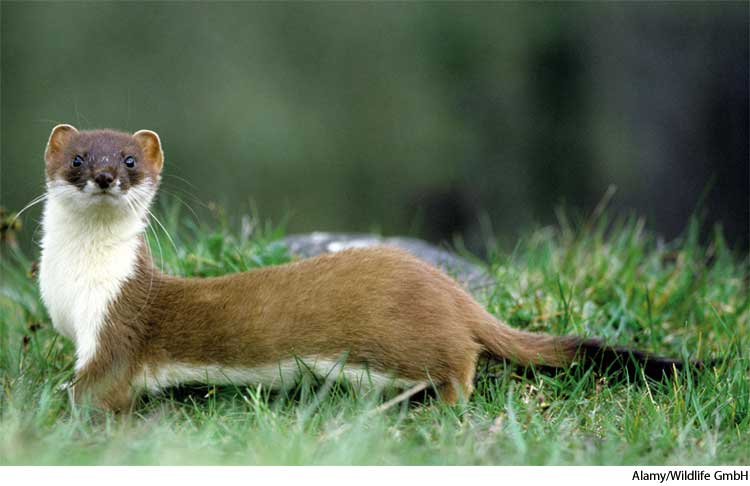

In [14]:
from IPython.display import Image
Image(filename = "/home/eeb177-student/Desktop/weasel.png")

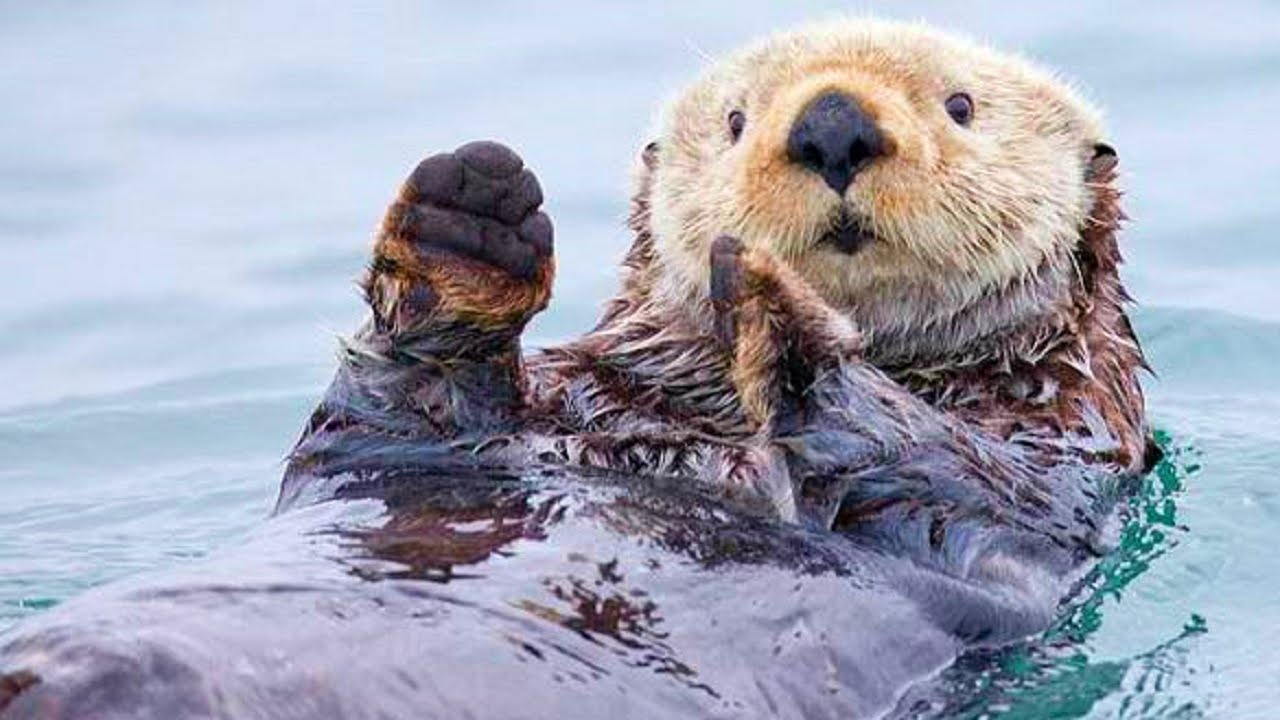

In [15]:
Image(filename = "/home/eeb177-student/Desktop/seaotters.png")

# In the Shell:

I downloaded the files from pbdb directly into my eeb177 final projects folder
I then had to rename the file to one that would be easily identified using:
```
mv pbdb_data\(14\).csv mustelidaepbdb.csv
```
I then checked the number of unique species using:
```
tail -n +19 mustelidaepbdb.csv | cut -d "," f 6 | sort | uniq | wc -l
```

# In Python:


### Recorded the age of the species:

In [6]:
## gives the age of each species based on the max mya and min mya
def age_dictionary(filename):
    agedict = {}
    #initiate the dictionary
    mustfile = open(filename, "r", encoding = "ISO-8859-15") #opens and reads the file that is given
    mustrecord = mustfile.readlines()[19:] #starts at the data, ignores the headers etc
    #for loop to fill the dictionary
    for line in mustrecord:
        
        record_elements = line.split(",")
        species = record_elements[5] #assigns the elements in column 6 as the species
        max_age = record_elements[14][1:-1] #removed the quotation marks around the number in order to conver to float later
        min_age = record_elements[15][1:-1] # removed the quotation marks around the number in order to conver to a float later
        age = float(max_age) - float(min_age) #converting the strings in columns 15 and 16 into floats and subtracting to get the age
        agedict[species] = age #assigns the key--species a value--age
    return agedict

### Recorded the time the species was first seen based on max million years ago:


In [7]:
## gives dictionary of species and its first arrival
def first_occ(filename):
    firstdict = {}
    #initiate dictionary that will hold the species aname and the first arrival of the species
    mustfile = open(filename, "r", encoding = "ISO-8859-15") #opens and reads the file that it is given
    mustrecord = mustfile.readlines()[19:] #make sure to start at numerical data
    #for loop that will fill the dictionary with the species names and their arrival dates
    for line in mustrecord:
        mustelements = line.split(",") #separates each element by a comma
        species = mustelements[5][1:-1] #remove quotation marks around the species name
        first_arrival = float(mustelements[14][1:-1]) #remove quotation marks around the age in order to convert string to float
        firstdict[species] = first_arrival #assigns the key-- species a value --first arrival mya
    return firstdict

### Recorded the time the species was last seen based on min million years ago:

In [8]:
def last_occ(filename):
    lastdict  = {}
    #initiate a dictionary that will hold the species name and the time it was last seen in mya
    mustfile = open(filename, "r", encoding = "ISO-8859-15") # opens and reads the file that the function is given
    mustrecord = mustfile.readlines()[19:] #starts reading at the numerical data
    #for loop that will fill the dictionary with the species names and the time it was last seen in mya
    for line in mustrecord:
        mustelements = line.split(",") #tells the computer that each element in the file is separated by a comma
        species = mustelements[5][1:-1] #gets the species name without the quotation marks around it. these will be the keys
        last_seen = float(mustelements[15][1:-1]) # gets the time the species was last seen without the quotation marks and converts it to a float
        lastdict[species] = last_seen #assigns the key--species name-- a value-- the time it was last seen in mya
    return lastdict

### Created a dictionary that holds both the minimum and maximum age of each species:

In [9]:
## large dictionary that has both the species' first and last ages
def create_gendict(filename):
    # uses the default dictionary we learned in class on thursday
    from collections import defaultdict
    #uses the function above that created a dictionary filled with the species' name and the time of first occurrence
    arrivaldict = first_occ(filename)
    #uses the function above that created a dictionary filled with the species' name and the time of last occurrence
    enddict = last_occ(filename)

    generaldictionary = defaultdict(list)
    
    #creates a dictionary. if the key already exists, the loop will append the value to a list of values associated with that key
    for index in (arrivaldict, enddict):
        for key, value in index.items():
            generaldictionary[key].append(value)
    return generaldictionary
    #in the end, each species name should have a time of first occurrence and a time of last occurrence associated with it

### File i/o that shows the dictionary created

In [10]:
##this is the dictionary that displays the species' name and the time of first and last occurrence associated with it.
create_gendict("mustelidaepbdb.csv")

defaultdict(list,
            {'Acheronictis n. sp. webbi': [30.8, 20.43],
             'Angustictis aff. mayri': [23.03, 22.4],
             'Angustictis mayri': [22.4, 20.0],
             'Aonyx ? bravardi': [2.588, 1.806],
             'Aonyx bravardi': [3.2, 2.588],
             'Aonyx capensis': [0.126, 0.0117],
             'Aonyx cinerea': [0.0117, 0.0],
             'Arctomeles n. sp. dimolodontus': [10.3, 1.8],
             'Arctomeles n. sp. sotnikovae': [5.333, 3.6],
             'Arctonyx collaris': [0.781, 0.126],
             'Arikarictis chapini': [24.8, 20.43],
             'Arikarictis n. sp. chapini': [30.8, 20.43],
             'Baranogale cf. helbingi': [3.2, 2.588],
             'Baranogale helbingi': [3.2, 2.588],
             'Brachyopsigale cf. dubius': [10.3, 4.9],
             'Brachyopsigale dubius': [4.9, 1.8],
             'Brachyopsigale n. sp. dubius': [4.9, 1.8],
             'Brachyprotoma brevimala': [0.126, 0.0],
             'Brachyprotoma n. sp. bre

### Creating a csv file with the maximum and minimum age of the species to be used in Rstudio:


In [11]:
from collections import defaultdict
with open("mustelidaepbdb.csv", "r") as bb:
    mustelidae_recs = bb.readlines()[19:]   
species_ranges_mustelidae = defaultdict(list)


for line in mustelidae_recs:
    line = line.replace('"','')
    species = line.split(",")[5]
    minage = float(line.split(',')[14])
    maxage = float(line.split(',')[15])
    mean_age = (minage + maxage)/2
    
    #add species as keys and mean ages as elements to the list of ages
    species_ranges_mustelidae[species].append(mean_age)
    

In [12]:
output = open("mustelidae_summary.csv", "w")
for key in species_ranges_mustelidae.keys():
    ages = species_ranges_mustelidae[key]
    minage = min(ages)
    maxage = max(ages)
    genus = key.split(" ")[0]
    species = key
    #print(genus, key, minage, maxage)
    outline = "{},{},{},{}\n".format(genus, species, minage, maxage)
    output.write(outline)
output.close()

# Using Rstudio to make the graphs showing the time of occurrence for each species:

```{r}
library(ggplot2)
mustelidae <- read.csv("//home/eeb177-student/Desktop/eeb-177/eeb177finalproj/mustelidae_summary.csv", header =F, as.is = T)

names(mustelidae) <- c("genus", "species", "minage", "maxage")
head(mustelidae)
```
```{r}
mustelidae_occ <- ggplot(mustelidae, aes( species, ymin = maxage, ymax=minage, colour = genus))
mustelidae_occ <- mustelidae_occ + geom_linerange()
mustelidae_occ <- mustelidae_occ + theme(legend.position="none") #gets rid of legend
mustelidae_occ <- mustelidae_occ + coord_flip() #flips the coordinats horizontally
mustelidae_occ <- mustelidae_occ +  theme(axis.text.y = element_text(size=3)) # resizes text
mustelidae_occ <- mustelidae_occ + theme(axis.ticks.y=element_blank()) # gets rid of tick marks on y axis
mustelidae_occ <- mustelidae_occ + scale_y_continuous(limits=c(0, 30), expand = c(0, 0), breaks=c(0, 5, 10, 15, 20, 25, 30)) # gets rid of space on right and left of the graph to make the graph itself larger
mustelidae_occ <- mustelidae_occ + labs(title = "Canid Fossil Occurrences", x = "Species", y = "Ma ago") + theme(plot.title = element_text(hjust = 0.5, size=22, face = "bold"), axis.title =element_text(size=20))  # adds titles and labels to the graph
mustelidae_occ
```
```{r}
ggsave(filename = "mustelidae_fossil_occurrences.pdf", plot = mustelidae_occ)
```

In [13]:
from IPython.display import IFrame
IFrame("mustelidae_fossil_occurrences.pdf", width = 800, height = 1000)

In [18]:
IFrame("mustelidae_occ_1_marginal_rates_RTT.pdf", width = 800, height = 1000)

# link to GitHub repository:
https://github.com/tdaang/finalproj